## S13 T01: Aprenentatge Supervisat - Classificació - Eduardo Baffi

### Part 2 (Exercises Level 2 and 3)

#### Descripció
Anem a practicar i a familiaritzar-nos amb algoritmes de classificació.

### Nivell 2
#### - Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

In [177]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Dataset Airlines Delay

Airline on-time statistics and delay causes Source: https://www.kaggle.com/giovamata/airlinedelaycauses

In [178]:
#pd.read_csv('DelayedFlights2.csv').to_parquet('DelayedFlights.dat')
df = pd.read_parquet('DelayedFlights.dat')
df.head(1)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [179]:
# Check for duplicated data
df.duplicated().sum()

0

In [180]:
# Create copy of the Dataset and start processing the data
# Check null values

flights_df = df.copy()
flights_df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [181]:
# % missing values per column 
missing_data_count = flights_df.isnull().sum()
total_rows = len(flights_df.index)
missing_percent = missing_data_count/total_rows*100
missing_percent

Unnamed: 0            0.000000
Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367108
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               0.000258
ActualElapsedTime     0.433043
CRSElapsedTime        0.010223
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                0.367108
TaxiOut               0.023493
Cancelled             0.000000
CancellationCode      0.000000
Diverted              0.000000
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
dtype: float64

In [182]:
# Delete rows with a low % of null values:'ArrTime','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','TaxiIn','TaxiOut'

# There are many null values in columns 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay' (about 35% of total). 
# The dataset is big, so these columns will be dropped to avoid distortion in the classification process
# Drop 'Unnamed: 0'column

flights_filtered = flights_df.copy()
flights_filtered = flights_filtered.dropna(axis=0, subset=['ArrTime','TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','TaxiIn','TaxiOut'])
flights_filtered = flights_filtered.drop(['Unnamed: 0', 'CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], 1)
flights_filtered.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
dtype: int64

In [183]:
#Create a column with binary values of delays.
#If there was a delay (ArrDelay>0), the value is 1. If not (ArrDelay<=0), value is 0.

def binary(x):
    if x > 0:
        return 1
    else:
        return 0

flights_filtered['Delay'] = flights_filtered['ArrDelay'].apply(binary)
pd.set_option('display.max_columns', None)
flights_filtered.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,Delay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,1
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,1
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,1
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,1


In [184]:
# Excluding column 'Year', because it has the same value for all the dataset and 
# Excluding  because the objective is to evaluated the flights that arrived to the destiny.
flights_filtered = flights_filtered.drop(['Year','Cancelled','CancellationCode','Diverted'], 1) 

In [269]:
# The dataset is big, so a sample will be used to speed up performance
sample_df = flights_filtered.sample(frac=0.02)

In [270]:
# Proportion of zeros compared to the total: 10,63%"
flights_filtered.Delay.value_counts() 

1    1723412
0     204956
Name: Delay, dtype: int64

In [271]:
# Sample - Proportion of zeros compared to the total is equivalent to the original dataset: 10,62%"
sample_df.Delay.value_counts()

1    34495
0     4072
Name: Delay, dtype: int64

In [272]:
# Before we start pre-processing the data, we would like to store the target variable separately.
features_df = sample_df.loc[: , sample_df.columns != 'Delay'] # Features

target_column = 'Delay'
y = sample_df[target_column] # Target variable

In [273]:
features_df.head(5)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
1224662,7,7,1,1753.0,1705,2240.0,2150,AA,498,N597AA,227.0,225.0,197.0,50.0,48.0,DFW,BOS,1562,5.0,25.0
928164,6,16,1,1816.0,1717,2056.0,2015,XE,2965,N16963,160.0,178.0,141.0,41.0,59.0,MSP,IAH,1034,6.0,13.0
1186596,7,7,1,2023.0,2012,2338.0,2325,F9,224,N916FR,135.0,133.0,117.0,13.0,11.0,SMF,DEN,910,10.0,8.0
498148,3,13,4,1957.0,1945,2042.0,2028,HA,398,N485HA,45.0,43.0,27.0,14.0,12.0,HNL,KOA,163,5.0,13.0
524720,3,6,4,912.0,725,1053.0,925,9E,5615,85329E,101.0,120.0,78.0,88.0,107.0,XNA,MSP,596,12.0,11.0


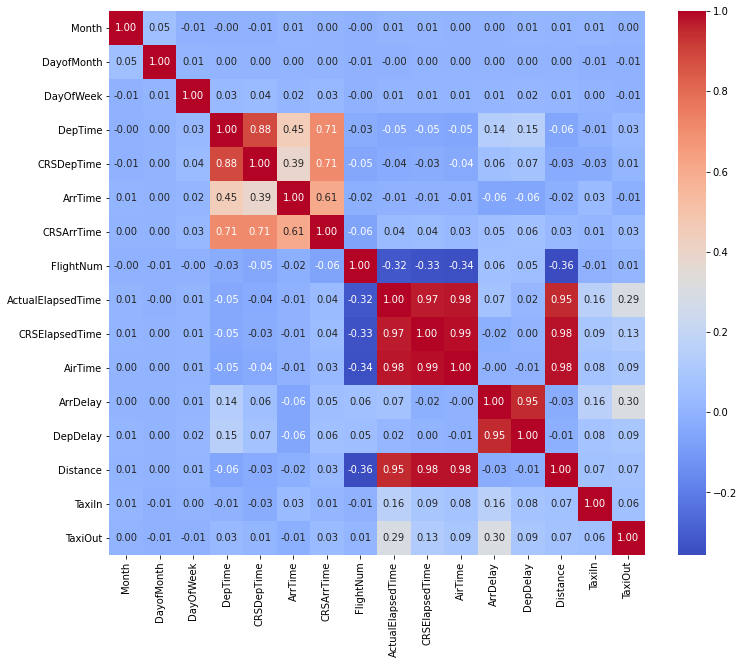

In [274]:
# Not necessarily every feature is going to have an impact on the output variable. It is necessary to do feature selection.
# Using Pearson Correlation for numerical features

import seaborn as sns

plt.figure(figsize=(12,10))
cor = features_df.corr()
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

In [275]:
# Correlation with output variable
cor_target = abs(cor["ArrDelay"])
cor_target

Month                0.003970
DayofMonth           0.000742
DayOfWeek            0.013449
DepTime              0.138595
CRSDepTime           0.056828
ArrTime              0.057793
CRSArrTime           0.051052
FlightNum            0.059067
ActualElapsedTime    0.071680
CRSElapsedTime       0.016255
AirTime              0.001566
ArrDelay             1.000000
DepDelay             0.951135
Distance             0.031950
TaxiIn               0.161251
TaxiOut              0.304436
Name: ArrDelay, dtype: float64

In [276]:
# Selecting highly correlated numerical features
relevant_features = cor_target[cor_target>0.1]
relevant_features

DepTime     0.138595
ArrDelay    1.000000
DepDelay    0.951135
TaxiIn      0.161251
TaxiOut     0.304436
Name: ArrDelay, dtype: float64

In [277]:
# Correlation of selected features with each other
# They are not corretad with each other and it makes sense to maintain all of them

print(features_df[["DepTime","DepDelay","TaxiIn","TaxiOut"]].corr())

           DepTime  DepDelay    TaxiIn   TaxiOut
DepTime   1.000000  0.149814 -0.010437  0.029801
DepDelay  0.149814  1.000000  0.076904  0.093154
TaxiIn   -0.010437  0.076904  1.000000  0.062387
TaxiOut   0.029801  0.093154  0.062387  1.000000


In [278]:
# From the previsous sprint (Sprint 12), it it known that the categorical columns could generate to many features after transformation
# Because of that, only 'UniqueCarrier will be maintened'

features_df = features_df.drop(['TailNum','Origin','Dest'], 1) 

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(features_df)

data_categorical = features_df[categorical_columns]
data_categorical.head()

,UniqueCarrier
1224662,AA
928164,XE
1186596,F9
498148,HA
524720,9E


In [279]:
# Just the numerical features were evaluated until now
# Now the categorical features will que transformed with OneHotEncoder and included in the analysis

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

data_encoded = encoder.fit_transform(data_categorical)

columns_encoded = encoder.get_feature_names(data_categorical.columns)
result = pd.DataFrame(data_encoded, columns=columns_encoded, index=features_df.index)
result.head()

,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
1224662,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
928164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1186596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524720,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [280]:
features_df = features_df.join(result) # Join the columns genetared after OneHotEncoder
features_df.head(5)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
1224662,7,7,1,1753.0,1705,2240.0,2150,AA,498,227.0,225.0,197.0,50.0,48.0,1562,5.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
928164,6,16,1,1816.0,1717,2056.0,2015,XE,2965,160.0,178.0,141.0,41.0,59.0,1034,6.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1186596,7,7,1,2023.0,2012,2338.0,2325,F9,224,135.0,133.0,117.0,13.0,11.0,910,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498148,3,13,4,1957.0,1945,2042.0,2028,HA,398,45.0,43.0,27.0,14.0,12.0,163,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524720,3,6,4,912.0,725,1053.0,925,9E,5615,101.0,120.0,78.0,88.0,107.0,596,12.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [281]:
cor = features_df.corr()
cor_target = abs(cor["ArrDelay"])
cor_target

Month                0.003970
DayofMonth           0.000742
DayOfWeek            0.013449
DepTime              0.138595
CRSDepTime           0.056828
ArrTime              0.057793
CRSArrTime           0.051052
FlightNum            0.059067
ActualElapsedTime    0.071680
CRSElapsedTime       0.016255
AirTime              0.001566
ArrDelay             1.000000
DepDelay             0.951135
Distance             0.031950
TaxiIn               0.161251
TaxiOut              0.304436
UniqueCarrier_9E     0.013923
UniqueCarrier_AA     0.022044
UniqueCarrier_AQ     0.005320
UniqueCarrier_AS     0.017556
UniqueCarrier_B6     0.032838
UniqueCarrier_CO     0.004419
UniqueCarrier_DL     0.009757
UniqueCarrier_EV     0.016192
UniqueCarrier_F9     0.027043
UniqueCarrier_FL     0.006256
UniqueCarrier_HA     0.015451
UniqueCarrier_MQ     0.012000
UniqueCarrier_NW     0.023748
UniqueCarrier_OH     0.025655
UniqueCarrier_OO     0.014238
UniqueCarrier_UA     0.023066
UniqueCarrier_US     0.021332
UniqueCarr

In [282]:
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

DepTime             0.138595
ArrDelay            1.000000
DepDelay            0.951135
TaxiIn              0.161251
TaxiOut             0.304436
UniqueCarrier_WN    0.110464
Name: ArrDelay, dtype: float64

Correlation of each company with the feature "ArrDelay" varies significantly, but none of them. 
The carrier WN, for example, has a corretaliton of around 0.10 with "ArrDelay".

After evaluating the features, only those which are highly correlated with the output variable "ArrDelay" (target) will be maintained.

Because al that, only the columns "DepTime", "DepDelay", "TaxiIn" and "TaxiOut" will be used in the classification models

The corretalion with "DepTime", "TaxiIn"and "TaxiOut"are not high, but they will be maintained because the rest of the numerical features have much smaller corr.

In [342]:
# Feature selection
filtered_columns = ["DepTime", "DepDelay", "TaxiIn", "TaxiOut" ]

selection_df = features_df[filtered_columns]
selection_df.head()

,DepTime,DepDelay,TaxiIn,TaxiOut
1224662,1753.0,48.0,5.0,25.0
928164,1816.0,59.0,6.0,13.0
1186596,2023.0,11.0,10.0,8.0
498148,1957.0,12.0,5.0,13.0
524720,912.0,107.0,12.0,11.0


In [343]:
selection_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38567 entries, 1224662 to 1165867
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DepTime   38567 non-null  float64
 1   DepDelay  38567 non-null  float64
 2   TaxiIn    38567 non-null  float64
 3   TaxiOut   38567 non-null  float64
dtypes: float64(4)
memory usage: 2.5 MB


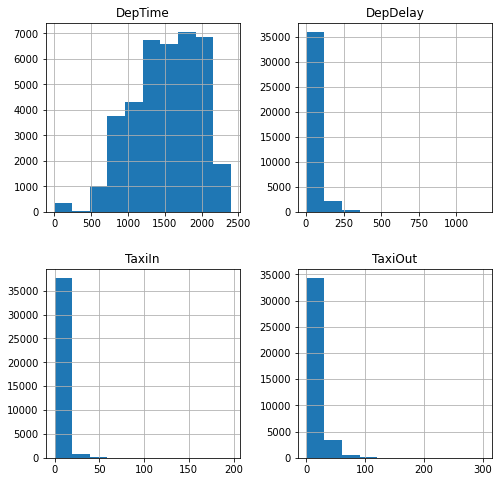

In [344]:
# Visualization of distribution of the the features to chake outliers

features=["DepTime", "DepDelay", "TaxiIn", "TaxiOut" ]
selection_df[features].hist(figsize=(8,8))
plt.show()

In [345]:
# Check for outliers
selection_df.describe()

,DepTime,DepDelay,TaxiIn,TaxiOut
count,38567.000000,38567.000000,38567.000000,38567.000000
mean,1520.481966,42.881790,6.809656,18.294682
std,451.082362,52.683327,5.433196,14.473689
min,1.000000,6.000000,0.000000,1.000000
25%,1205.000000,12.000000,4.000000,10.000000
50%,1546.000000,24.000000,6.000000,14.000000
75%,1902.000000,53.000000,8.000000,21.000000
max,2400.000000,1179.000000,197.000000,301.000000


In [346]:
print(selection_df[features].skew())

DepTime    -0.405814
DepDelay    4.246962
TaxiIn      7.409912
TaxiOut     4.566801
dtype: float64


The ideal skewness value should be between -1 and +1. A major deviation from this range indicates the presence of extreme values. In our case, the results of "DepDelay", "TaxiIn" and "TaxiOut" may indicate the presence of outliers, but maybe a valid reason for these observations.

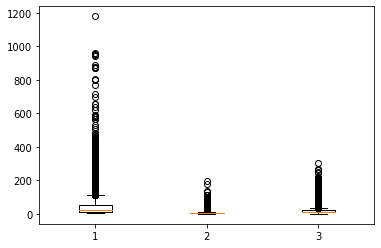

In [347]:
# Boxplot
plt.boxplot(selection_df[["DepDelay", "TaxiIn", "TaxiOut"]])
plt.show()

In [349]:
# Quantile-based Flooring and Capping

print(selection_df['DepDelay'].quantile(0.10))
print(selection_df['DepDelay'].quantile(0.90))
print("")
print(selection_df['TaxiIn'].quantile(0.10))
print(selection_df['TaxiIn'].quantile(0.90))
print("")
print(selection_df['TaxiOut'].quantile(0.10))
print(selection_df['TaxiOut'].quantile(0.90))

8.0
101.0

3.0
11.0

8.0
32.0


In [351]:
#Removing outliers

selection_df['DepDelay'] = np.where(selection_df['DepDelay'] <8.0, 8.0,selection_df['DepDelay'])
selection_df['DepDelay'] = np.where(selection_df['DepDelay'] >101.0, 101.0,selection_df['DepDelay'])
print(f"DepDelay: {selection_df['DepDelay'].skew()}")
print("")
selection_df['TaxiIn'] = np.where(selection_df['TaxiIn'] <3.0, 3.0,selection_df['TaxiIn'])
selection_df['TaxiIn'] = np.where(selection_df['TaxiIn'] >11.0, 11.0,selection_df['TaxiIn'])
print(f"TaxiIn: {selection_df['TaxiIn'].skew()}")
print("")
selection_df['TaxiOut'] = np.where(selection_df['TaxiOut'] <8.0, 8.0,selection_df['TaxiOut'])
selection_df['TaxiOut'] = np.where(selection_df['TaxiOut'] >32.0, 32.0,selection_df['TaxiOut'])
print(f"TaxiOut: {selection_df['TaxiOut'].skew()}")

DepDelay: 1.0302764804937046

TaxiIn: 0.5862409049123362

TaxiOut: 0.8126871981515374


In [352]:
# Results after removing outliers
selection_df[["DepDelay", "TaxiIn", "TaxiOut"]].describe()

,DepDelay,TaxiIn,TaxiOut
count,38567.000000,38567.000000,38567.000000
mean,36.619934,6.168719,16.568206
std,30.680309,2.633232,7.590592
min,8.000000,3.000000,8.000000
25%,12.000000,4.000000,10.000000
50%,24.000000,6.000000,14.000000
75%,53.000000,8.000000,21.000000
max,101.000000,11.000000,32.000000


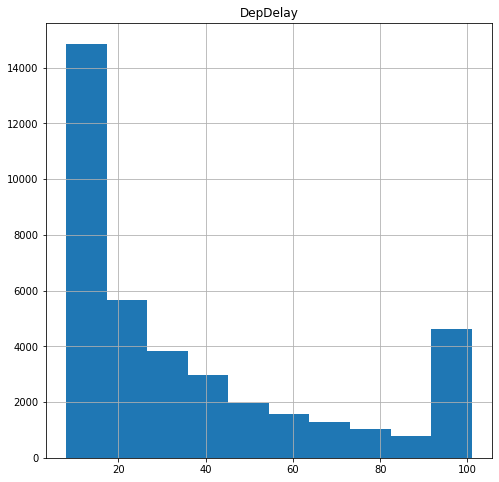

In [353]:
features=["DepDelay"]#, "TaxiIn", "TaxiOut" ]
selection_df[features].hist(figsize=(8,8))
plt.show()

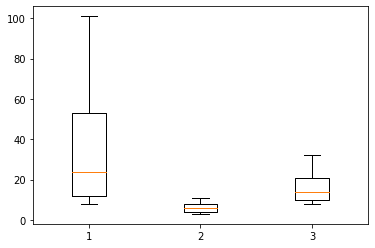

In [355]:
plt.boxplot(selection_df[["DepDelay", "TaxiIn", "TaxiOut"]])
plt.show()

In [366]:
# Standardization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()

features = ["DepTime","DepDelay", "TaxiIn", "TaxiOut"]

# Scale the data
x = selection_df.loc[:, features].values
x = ss.fit_transform(x)
scaled_features_df = pd.DataFrame(x, index=selection_df.index, columns=selection_df.loc[:, features].columns)
scaled_features_df

,DepTime,DepDelay,TaxiIn,TaxiOut
1224662,0.730304,0.430108,0.250,0.708333
928164,0.756565,0.548387,0.375,0.208333
1186596,0.842851,0.032258,0.875,0.000000
498148,0.815340,0.043011,0.250,0.208333
524720,0.379742,1.000000,1.000,0.125000
...,...,...,...,...
1558633,0.258441,0.064516,0.125,0.041667
300353,0.641517,0.903226,0.625,1.000000
335799,0.685286,1.000000,0.875,0.291667
672231,0.752397,0.301075,0.375,0.500000


In [367]:
scaled_features_df.describe()

,DepTime,DepDelay,TaxiIn,TaxiOut
count,38567.000000,38567.000000,38567.000000,38567.000000
mean,0.633381,0.307741,0.396090,0.357009
std,0.188029,0.329896,0.329154,0.316275
min,0.000000,0.000000,0.000000,0.000000
25%,0.501876,0.043011,0.125000,0.083333
50%,0.644018,0.172043,0.375000,0.250000
75%,0.792414,0.483871,0.625000,0.541667
max,1.000000,1.000000,1.000000,1.000000


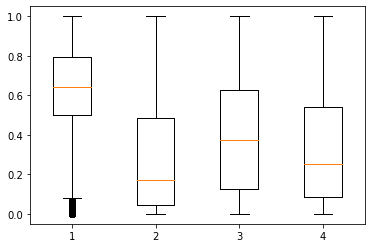

In [368]:
plt.boxplot(scaled_features_df)
plt.show()

After feature selection, outlier cleaning and standartization, the distribution of the data have improved. 
Now it is time to test the classification models to verify the results.

##### Decision Tree Classification

In [369]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X = scaled_features_df # Features

target_column = 'Delay'
y = sample_df[target_column] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_dtree = DecisionTreeClassifier() # Create Decision Tree classifer object
clf_dtree = clf_dtree.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred_dtree = clf_dtree.predict(X_test) #Predict the response for test dataset
y_predprob_dtree =  clf_dtree.predict_proba(X_test)[:,1] # Predicted probabilities for class 1 (Delay = 1)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtree))
confusion = metrics.confusion_matrix(y_test, y_pred_dtree)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Classification Error (Misclassification Rate): indicates how often the classifier is incorrect
print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_dtree))

# Sensitivity (or Recall, or True Positive Rate):  proportion of positive class that is correctly predicted as positive
print('Sensitivity:', metrics.recall_score(y_test, y_pred_dtree)) 

# Specificity: proportion of negative class that is correctly predicted as negative
specificity = TN / (TN + FP) 
print('Specificity:', specificity)

# When the actual value is negative, the rate means how often is the prediction incorrect
print('False Positive Rate:', 1 - specificity) 

# Precision: when a positive value is predicted, how often is the prediction correct
print('Precision:', metrics.precision_score(y_test, y_pred_dtree))

# F1 Score: weighted average of the precision and recall (harmonic mean of the two measures)
print('F1 Score:', metrics.f1_score(y_test, y_pred_dtree))

# AUC
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_dtree))

Accuracy: 0.8561057816956184
Confusion Matrix:
[[ 438  777]
 [ 888 9468]]
Classification Error: 0.14389421830438165
Sensitivity: 0.9142526071842411
Specificity: 0.36049382716049383
False Positive Rate: 0.6395061728395062
Precision: 0.9241581259150805
F1 Score: 0.9191786806465706
AUC: 0.6373505667377175


##### K-nearest neighbors (KNN)

In [370]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)
y_predprob_knn = classifier.predict_proba(X_test)[:,1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

confusion = metrics.confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_knn))
print('Sensitivity:', metrics.recall_score(y_test, y_pred_knn)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, y_pred_knn))
print('F1 Score:', metrics.f1_score(y_test, y_pred_knn))

Accuracy: 0.8838475499092558
Confusion Matrix:
[[ 299  916]
 [ 428 9928]]
Classification Error: 0.11615245009074415
Sensitivity: 0.9586713016608729
Specificity: 0.24609053497942388
False Positive Rate: 0.7539094650205761
Precision: 0.915529324972335
F1 Score: 0.9366037735849057


In [371]:
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_knn))

AUC: 0.785559910797025


##### Logistic Regression

In [377]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()  # Instantiate the model (default parameters)
logreg.fit(X_train,y_train)  # fit the model with data

y_pred_logr=logreg.predict(X_test)
y_predprob_logr=logreg.predict_proba(X_test)[:,1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logr))

confusion = metrics.confusion_matrix(y_test, y_pred_logr)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_logr))
print('Sensitivity:', metrics.recall_score(y_test, y_pred_logr)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, y_pred_logr))
print('F1 Score:', metrics.f1_score(y_test, y_pred_logr))
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_logr))

Accuracy: 0.8949096880131363
Confusion Matrix:
[[   34  1181]
 [   35 10321]]
Classification Error: 0.1050903119868637
Sensitivity: 0.996620316724604
Specificity: 0.027983539094650206
False Positive Rate: 0.9720164609053498
Precision: 0.8973222048339419
F1 Score: 0.9443681947113185
AUC: 0.8841898774015422


##### Support Vector Machines (SVM)

In [373]:
from sklearn import svm

clf = svm.SVC(kernel='linear', probability=True, max_iter=1) # Linear Kernel

clf.fit(X_train, y_train) 

y_pred_svm = clf.predict(X_test) 
y_predprob_svm = clf.predict_proba(X_test)[:,1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

confusion = metrics.confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_svm))
print('Sensitivity:', metrics.recall_score(y_test, y_pred_svm)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, y_pred_svm))
print('F1 Score:', metrics.f1_score(y_test, y_pred_svm))
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_svm))

Accuracy: 0.556995938121165
Confusion Matrix:
[[1197   18]
 [5108 5248]]
Classification Error: 0.443004061878835
Sensitivity: 0.5067593665507918
Specificity: 0.9851851851851852
False Positive Rate: 0.014814814814814836
Precision: 0.9965818458032663
F1 Score: 0.6718729996159262
AUC: 0.1455698928833129


##### XGBoost

In [374]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

xg_reg.fit(X_train,y_train)

pred_xg = xg_reg.predict(X_test)
predprob_xg = xg_reg.predict_proba(X_test)[:,1] 

print("Accuracy:",metrics.accuracy_score(y_test, pred_xg))

confusion = metrics.confusion_matrix(y_test, pred_xg)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, pred_xg))
print('Sensitivity:', metrics.recall_score(y_test, pred_xg)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, pred_xg))
print('F1 Score:', metrics.f1_score(y_test, pred_xg))
print('AUC:', metrics.roc_auc_score(y_test, predprob_xg))

Accuracy: 0.8948232650591997
Confusion Matrix:
[[  294   921]
 [  296 10060]]
Classification Error: 0.10517673494080026
Sensitivity: 0.9714175357280803
Specificity: 0.2419753086419753
False Positive Rate: 0.7580246913580246
Precision: 0.9161278572079046
F1 Score: 0.9429629282467076
AUC: 0.8749533480521422


Although the feature selection, outlier cleaning and standartization were implemented, the results of the classifications did not improve if compared to results obtained in exercise 1 (considering default parameters, in general). It is important to mention that the correlation between "ArrDelay and "DepDelay" is very high and the rest of the features have much smaller correlations. Even if some parameters were changed, the results were not better than before. It would be necessary a deeper analysis of the classifications models, outliers and the data in order to try to improve the models. The data is imbalanced (disproportionate ratio of observations in each class) and maybe the results could be better if this situation could be properly handled.

Let's try to handle imbalaced dat to improve results

##### Resampling Techniques — Oversample minority class

In [385]:
# Oversamplig minority class

from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_delay = X[X.Delay==0]
delay = X[X.Delay==1]

# upsample minority
delay_upsampled = resample(not_delay,
                          replace=True, # sample with replacement
                          n_samples=len(delay), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([delay, delay_upsampled])

# check new class counts
upsampled.Delay.value_counts()
   

0    24139
1    24139
Name: Delay, dtype: int64

In [386]:
upsampled

,DepTime,DepDelay,TaxiIn,TaxiOut,Delay
1240708,0.713214,0.494624,0.000,0.125000,1
494451,0.844102,0.032258,0.125,1.000000,1
896671,0.795748,0.021505,0.125,0.000000,1
1826058,0.674865,0.000000,0.750,0.416667,1
911316,0.601084,0.376344,0.250,0.375000,1
...,...,...,...,...,...
99894,0.678616,0.032258,1.000,0.166667,0
1595620,0.503960,0.021505,0.000,0.500000,0
672518,0.416840,0.139785,0.125,0.291667,0
1882420,0.474781,0.129032,0.250,0.041667,0


In [391]:
# trying logistic regression again with the balanced dataset
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

y_train = upsampled.Delay
X_train = upsampled.drop('Delay', axis=1)

classif = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = classif.predict(X_test)

# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.7411632529599862

In [392]:
# f1 score
f1_score(y_test, upsampled_pred)

0.8333796940194715

In [393]:
recall_score(y_test, upsampled_pred)

0.7232522209347239

Oversample minority class did not improve the results of the Logistic Regression.

##### SMOTE - Generate synthetic samples

In [397]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
X = scaled_features_df # Features

target_column = 'Delay'
y = sample_df[target_column]

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.7497407176934247

In [398]:
# f1 score
f1_score(y_test, smote_pred)

0.8396997276290441

In [399]:
recall_score(y_test, smote_pred)

0.733263719689059

SMOTE did not improve the results of the Logistic Regression.

### Nivell 3

#### - Exercici 6
No utilitzis la variable DepDelay a l’hora de fer prediccions

In [401]:
scaled_features_df.head(1) 

,DepTime,DepDelay,TaxiIn,TaxiOut
1224662,0.730304,0.430108,0.25,0.708333


##### Decision Tree Classification

In [403]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X = scaled_features_df[["DepTime", "TaxiIn", "TaxiOut"]] # Features

target_column = 'Delay'
y = sample_df[target_column] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_dtree = DecisionTreeClassifier() # Create Decision Tree classifer object
clf_dtree = clf_dtree.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred_dtree = clf_dtree.predict(X_test) #Predict the response for test dataset
y_predprob_dtree =  clf_dtree.predict_proba(X_test)[:,1] # Predicted probabilities for class 1 (Delay = 1)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtree))
confusion = metrics.confusion_matrix(y_test, y_pred_dtree)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_dtree))
print('Sensitivity:', metrics.recall_score(y_test, y_pred_dtree)) 
print('Specificity:', specificity)
print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, y_pred_dtree))
print('F1 Score:', metrics.f1_score(y_test, y_pred_dtree))
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_dtree))

Accuracy: 0.8064990061360298
Confusion Matrix:
[[ 213 1002]
 [1237 9119]]
Classification Error: 0.19350099386397024
Sensitivity: 0.880552336809579
Specificity: 0.027983539094650206
False Positive Rate: 0.9720164609053498
Precision: 0.9009979251062148
F1 Score: 0.890657811202813
AUC: 0.5289879865273626


In [410]:
X

,DepTime,TaxiIn,TaxiOut
1224662,0.730304,0.250,0.708333
928164,0.756565,0.375,0.208333
1186596,0.842851,0.875,0.000000
498148,0.815340,0.250,0.208333
524720,0.379742,1.000,0.125000
...,...,...,...
1558633,0.258441,0.125,0.041667
300353,0.641517,0.625,1.000000
335799,0.685286,0.875,0.291667
672231,0.752397,0.375,0.500000


##### K-nearest neighbors (KNN)

In [404]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred_knn = classifier.predict(X_test)
y_predprob_knn = classifier.predict_proba(X_test)[:,1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

confusion = metrics.confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_knn))
print('Sensitivity:', metrics.recall_score(y_test, y_pred_knn)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, y_pred_knn))
print('F1 Score:', metrics.f1_score(y_test, y_pred_knn))
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_knn))

Accuracy: 0.8821190908305245
Confusion Matrix:
[[   50  1165]
 [  199 10157]]
Classification Error: 0.11788090916947547
Sensitivity: 0.9807840865198918
Specificity: 0.0411522633744856
False Positive Rate: 0.9588477366255144
Precision: 0.8971029853382795
F1 Score: 0.9370790663345326
AUC: 0.5778098857623342


###### Logistic Regression

In [406]:
X = scaled_features_df[["DepTime", "TaxiIn", "TaxiOut"]] # Features

target_column = 'Delay'
y = sample_df[target_column] # Target variable

logreg = LogisticRegression()  # Instantiate the model (default parameters)
logreg.fit(X_train,y_train)  # fit the model with data

y_pred_logr=logreg.predict(X_test)
y_predprob_logr=logreg.predict_proba(X_test)[:,1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logr))

confusion = metrics.confusion_matrix(y_test, y_pred_logr)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_logr))
print('Sensitivity:', metrics.recall_score(y_test, y_pred_logr)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, y_pred_logr))
print('F1 Score:', metrics.f1_score(y_test, y_pred_logr))
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_logr))

Accuracy: 0.8949961109670729
Confusion Matrix:
[[    0  1215]
 [    0 10356]]
Classification Error: 0.10500388903292712
Sensitivity: 1.0
Specificity: 0.0
False Positive Rate: 1.0
Precision: 0.8949961109670729
F1 Score: 0.9445888630455603
AUC: 0.6766089358746326


##### Support Vector Machines (SVM)

In [407]:
from sklearn import svm

clf = svm.SVC(kernel='linear', probability=True, max_iter=1) # Linear Kernel

clf.fit(X_train, y_train) 

y_pred_svm = clf.predict(X_test) 
y_predprob_svm = clf.predict_proba(X_test)[:,1]

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

confusion = metrics.confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_svm))
print('Sensitivity:', metrics.recall_score(y_test, y_pred_svm)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, y_pred_svm))
print('F1 Score:', metrics.f1_score(y_test, y_pred_svm))
print('AUC:', metrics.roc_auc_score(y_test, y_predprob_svm))

Accuracy: 0.8949961109670729
Confusion Matrix:
[[    0  1215]
 [    0 10356]]
Classification Error: 0.10500388903292712
Sensitivity: 1.0
Specificity: 0.0
False Positive Rate: 1.0
Precision: 0.8949961109670729
F1 Score: 0.9445888630455603
AUC: 0.5


##### XGBoost

In [408]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

xg_reg.fit(X_train,y_train)

pred_xg = xg_reg.predict(X_test)
predprob_xg = xg_reg.predict_proba(X_test)[:,1] 

print("Accuracy:",metrics.accuracy_score(y_test, pred_xg))

confusion = metrics.confusion_matrix(y_test, pred_xg)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print('Classification Error:', 1 - metrics.accuracy_score(y_test, pred_xg))
print('Sensitivity:', metrics.recall_score(y_test, pred_xg)) 

specificity = TN / (TN + FP) 
print('Specificity:', specificity)

print('False Positive Rate:', 1 - specificity) 
print('Precision:', metrics.precision_score(y_test, pred_xg))
print('F1 Score:', metrics.f1_score(y_test, pred_xg))
print('AUC:', metrics.roc_auc_score(y_test, predprob_xg))

Accuracy: 0.8934404977962147
Confusion Matrix:
[[   11  1204]
 [   29 10327]]
Classification Error: 0.1065595022037853
Sensitivity: 0.9971996910003863
Specificity: 0.00905349794238683
False Positive Rate: 0.9909465020576131
Precision: 0.8955858121585292
F1 Score: 0.9436651893818249
AUC: 0.6610243639201623


In general, classifications modeled without 'DepDelay' had results worse than those that included this feature. Specificity, False Positive Rate and AUC were very affcted and some results are kite poor.

'DepDelay' is highly correlated with the output variable "ArrDelay" (target). The rest of the features have much smaller correlation with the target.